In [1]:
import math
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from scipy import stats
import statistics

from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
import tcremb.data_proc as data_proc

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
outputs_path = 'data/data_preped/'

In [5]:
tcr_columns_paired = {'single': ['cdr3aa','v','j','chain'],'paired': {'TRA': ['a_cdr3aa', 'TRAV', 'TRAJ'],'TRB': [ 'b_cdr3aa', 'TRBV', 'TRBJ']}}
tcr_columns = ['cdr3aa','v','j','chain']
clonotype_id_column = 'cloneId'
data_id= 'data_id'
annotation_id = 'annotId'
pairing_id = 'barcode'
annotation_tcr_id_columns_dict = {'TRA': 'cloneId','TRB': 'cloneId','TRA_TRB': {'TRA':'cloneId_TRA', 'TRB':'cloneId_TRB'}}

## Prototypes generated

### TRA

In [12]:
data_raw_path = 'data/olga_generated/olga_humanTRA_3000.txt'
data_output_path = outputs_path +'olga_humanTRA.txt'

In [17]:
data_raw_path = 'data/olga_generated/olga_humanTRA_100.txt'
data_output_path = outputs_path +'olga_humanTRA_100.txt'

In [22]:
data_raw_path = 'data/olga_generated/olga_humanTRA_1000.txt'
data_output_path = outputs_path +'olga_humanTRA_1000.txt'

In [27]:
data_raw_path = 'data/olga_generated/olga_humanTRA_5000.txt'
data_output_path = outputs_path +'olga_humanTRA_5000.txt'

In [32]:
data_raw_path = 'data/olga_generated/olga_humanTRA_150.tsv'
data_output_path = outputs_path +'olga_humanTRA_150.txt'

In [37]:
data_raw_path = 'data/olga_generated/olga_humanTRA_300.tsv'
data_output_path = outputs_path +'olga_humanTRA_300.txt'

In [42]:
data_raw_path = 'data/olga_generated/olga_humanTRA_500.tsv'
data_output_path = outputs_path +'olga_humanTRA_500.txt'

In [47]:
data_raw_path = 'data/olga_generated/olga_humanTRA_2000.tsv'
data_output_path = outputs_path +'olga_humanTRA_2000.txt'

In [48]:
data = pd.read_csv(data_raw_path,sep='\t',header=None)
data = data.rename({0:'cdr3nt',1:'cdr3aa',2:'v',3:'j'},axis=1)

In [49]:
data_preped = data_proc.remove_asterisk(data, ['cdr3nt','cdr3aa','v','j'])
data_preped = data_proc.remove_backslash(data_preped, ['cdr3nt','cdr3aa','v','j'])
data_preped = data_proc.filter_clones_data(data_preped, ['cdr3nt','cdr3aa','v','j'])
data_preped = data_proc.filter_segments(data_preped)
data_preped.shape

(1965, 4)

In [50]:
data_preped = data_preped.drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

In [51]:
data_preped.to_csv(data_output_path, sep='\t',header=False)

### TRB

In [52]:
data_raw_path = 'data/olga_generated/olga_humanTRB_3000.txt'
data_output_path = outputs_path +'olga_humanTRB.txt'

In [58]:
data_raw_path = 'data/olga_generated/olga_humanTRB_100.txt'
data_output_path = outputs_path +'olga_humanTRB_100.txt'

In [63]:
data_raw_path = 'data/olga_generated/olga_humanTRB_1000.txt'
data_output_path = outputs_path +'olga_humanTRB_1000.txt'

In [68]:
data_raw_path = 'data/olga_generated/olga_humanTRB_5000.txt'
data_output_path = outputs_path +'olga_humanTRB_5000.txt'

In [73]:
data_raw_path = 'data/olga_generated/olga_humanTRB_150.tsv'
data_output_path = outputs_path +'olga_humanTRB_150.txt'

In [78]:
data_raw_path = 'data/olga_generated/olga_humanTRB_300.tsv'
data_output_path = outputs_path +'olga_humanTRB_300.txt'

In [83]:
data_raw_path = 'data/olga_generated/olga_humanTRB_500.tsv'
data_output_path = outputs_path +'olga_humanTRB_500.txt'

In [88]:
data_raw_path = 'data/olga_generated/olga_humanTRB_2000.tsv'
data_output_path = outputs_path +'olga_humanTRB_2000.txt'

In [89]:
data = pd.read_csv(data_raw_path,sep='\t',header=None)
data = data.rename({0:'cdr3nt',1:'cdr3aa',2:'v',3:'j'},axis=1)

In [90]:
data_preped = data_proc.remove_asterisk(data, ['cdr3nt','cdr3aa','v','j'])
data_preped = data_proc.remove_backslash(data_preped, ['cdr3nt','cdr3aa','v','j'])
data_preped = data_proc.filter_clones_data(data_preped, ['cdr3nt','cdr3aa','v','j'])
data_preped = data_proc.filter_segments(data_preped)
data_preped.shape

(2000, 4)

In [91]:
data_preped = data_preped.drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

In [92]:
data_preped.to_csv(data_output_path, sep='\t',header=False)

## VDJdb

In [6]:
label = 'antigen.epitope'
label_s = 'antigen.species'

In [7]:
data_raw_path = 'data/vdjdb_full.txt'
data_tra_output_path = outputs_path +'VDJdb_data_paired.csv'
data_tra_output_path = outputs_path +'VDJdb_data_TRA.csv'
data_trb_output_path = outputs_path +'VDJdb_data_TRB.csv'

prototypes_tra_output_path = outputs_path +'VDJdb_prototypes_TRA.txt'
prototypes_trb_output_path = outputs_path +'VDJdb_prototypes_TRB.txt'


data_output_path = outputs_path +'VDJdb_data_paired.csv'
data_train_output_path = outputs_path +'VDJdb_data_train.csv'
data_test_output_path = outputs_path +'VDJdb_data_test.csv'

In [8]:
data = pd.read_csv(data_raw_path,sep='\t')

data = data.rename({'cdr3.alpha':'a_cdr3aa','v.alpha':'TRAV','j.alpha':'TRAJ','cdr3.beta':'b_cdr3aa','v.beta':'TRBV','j.beta':'TRBJ'},axis=1)



### Assign data id

In [9]:
data = data_proc.annot_id(data, data_id)
data.shape

(62177, 35)

In [24]:
data.columns

Index(['a_cdr3aa', 'TRAV', 'TRAJ', 'b_cdr3aa', 'TRBV', 'd.beta', 'TRBJ',
       'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope',
       'antigen.gene', 'antigen.species', 'reference.id',
       'method.identification', 'method.frequency', 'method.singlecell',
       'method.sequencing', 'method.verification', 'meta.study.id',
       'meta.cell.subset', 'meta.subject.cohort', 'meta.subject.id',
       'meta.replica.id', 'meta.clone.id', 'meta.epitope.id', 'meta.tissue',
       'meta.donor.MHC', 'meta.donor.MHC.method', 'meta.structure.id',
       'cdr3fix.alpha', 'cdr3fix.beta', 'vdjdb.score', 'data_id'],
      dtype='object')

### data proc

In [10]:
data_preped = data.copy()

data_preped = data_proc.remove_backslash(data_preped,tcr_columns_paired['paired']['TRA'])
data_preped = data_proc.remove_backslash(data_preped,tcr_columns_paired['paired']['TRB'])
data_preped.shape

(62177, 35)

In [11]:
data_preped = data_proc.remove_asterisk(data_preped, tcr_columns_paired['paired']['TRA'])
data_preped = data_proc.remove_asterisk(data_preped, tcr_columns_paired['paired']['TRB'])
data_preped.shape

(62177, 35)

In [12]:
def filter_clones_data_nan(df, columns):
    #print(df_clones.shape)
    df_clones=df.copy()
    for i in range(len(columns)):
        df_clones['any_nan'] = df_clones[columns[i]].isna() + df_clones[columns[i]].fillna('').str.contains('\.',na=False) + df_clones[columns[i]].fillna('').str.contains(',',na=False)
        df_clones[columns[0]] =  df_clones.apply(lambda x: np.nan if x['any_nan']==True else x[columns[0]],axis=1)
        df_clones[columns[1]] =  df_clones.apply(lambda x: np.nan if x['any_nan']==True else x[columns[1]],axis=1)
        df_clones[columns[2]] =  df_clones.apply(lambda x: np.nan if x['any_nan']==True else x[columns[2]],axis=1)
        
    
    df_clones['any_nan'] = df_clones[columns[0]].fillna('').str.contains('\_',na=False) + df_clones[columns[0]].fillna('').str.contains('\*',na=False)
    df_clones[columns[0]] =  df_clones.apply(lambda x: np.nan if x['any_nan']==True else x[columns[0]],axis=1)
    df_clones[columns[1]] =  df_clones.apply(lambda x: np.nan if x['any_nan']==True else x[columns[1]],axis=1)
    df_clones[columns[2]] =  df_clones.apply(lambda x: np.nan if x['any_nan']==True else x[columns[2]],axis=1)

    #df_clones = df_clones.reset_index(drop=True)
    return df_clones

In [13]:
data_preped = filter_clones_data_nan(data_preped,tcr_columns_paired['paired']['TRA'])
data_preped = filter_clones_data_nan(data_preped,tcr_columns_paired['paired']['TRB'])
data_preped.shape

(62177, 36)

In [14]:
data_preped=data_preped[~((data_preped['a_cdr3aa'].isna())&(data_preped['b_cdr3aa'].isna()))]
data_preped.shape

(61850, 36)

In [15]:
data_preped = data_proc.filter_segments(data_preped, v='TRAV', j='TRAJ')
data_preped = data_proc.filter_segments(data_preped, v='TRBV', j='TRBJ')
data_preped.shape

(58663, 36)

In [16]:

data_preped = data_preped[-data_preped['reference.id'].str.startswith('https://www.10xgenomics',na=False)].reset_index(drop=True)
print(data_preped.shape)
data_preped = data_preped[data_preped['species']=='HomoSapiens']
print(data_preped.shape)


(38305, 36)
(36391, 36)


### frequent labels

In [17]:
data_preped = data_proc.freq_labels(label, data_id, data_preped, n = 15)
#data_preped = data_proc.freq_labels_tr_list(label, data_id, data_preped, [10,20,30,50,100,500,1000])
data_preped = data_proc.freq_labels(label_s, data_id, data_preped, n = 15)
#data_preped = data_proc.freq_labels_tr_list(label_s, data_id, data_preped, [10,20,30,50,100,500,1000])

### save

In [18]:
data_output_path

'data/data_preped/VDJdb_data_paired.csv'

In [19]:
cols = ['a_cdr3aa', 'TRAV', 'TRAJ', 'b_cdr3aa', 'TRBV', 'd.beta', 'TRBJ',
       'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope',
       'antigen.gene', 'antigen.species', 'reference.id','data_id',
       'antigen.epitope_freq', 'antigen.species_freq']

In [20]:
data_preped = data_preped[cols]

In [21]:
data_preped.to_csv(data_output_path, sep='\t',index=False)

In [21]:
data_preped_a = data_preped[~data_preped['a_cdr3aa'].isna()].drop_duplicates(tcr_columns_paired['paired']['TRA']).reset_index(drop=True)
data_preped_a

,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,d.beta,TRBJ,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,data_id,antigen.epitope_freq,antigen.species_freq
0,CIVRAPGRADMRF,TRAV26-1,TRAJ43,CASSYLPGQGDHYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,0,other,HIV-1
1,CAVPSGAGSYQLTF,TRAV20,TRAJ28,CASSFEPGQGFYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,2,other,HIV-1
2,CAYRPPGTYKYIF,TRAV38-2DV8,TRAJ40,CASSALASLNEQFF,TRBV14,NaN,TRBJ2-1,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,4,other,HIV-1
3,CAYTVLGNEKLTF,TRAV38-1,TRAJ48,CASSFTPYNEQFF,TRBV28,NaN,TRBJ2-1,HomoSapiens,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,PMID:12555663,667,ELAGIGILTV,HomoSapiens
4,CAVAGYGGSQGNLIF,TRAV12-2,TRAJ42,CASSPQGLGTEAFF,TRBV28,NaN,TRBJ1-1,HomoSapiens,HLA-A*02,B2M,MHCI,ELAGIGILTV,MLANA,HomoSapiens,PMID:12555663,668,ELAGIGILTV,HomoSapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,CIVYNNDMRF,TRAV26-1,TRAJ43,CASSFRSTDTQYF,TRBV7-2,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62171,other,Wheat
11857,CMDEGGSNYKLTF,TRAV26-1,TRAJ53,CASSVRSTDTQYF,TRBV7-2,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62172,other,Wheat
11858,CSLYNNNDMRF,TRAV26-1,TRAJ43,CASSLRYTDTQYF,TRBV7-2,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62173,other,Wheat
11859,CALSTDSWGKLQF,TRAV6,TRAJ24,CASSPGQGGDNEQFF,TRBV7-3,NaN,TRBJ2-1,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62174,other,Wheat


In [22]:
data_preped_b = data_preped[~data_preped['b_cdr3aa'].isna()].drop_duplicates(tcr_columns_paired['paired']['TRB']).reset_index(drop=True)
data_preped_b

,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,d.beta,TRBJ,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,data_id,antigen.epitope_freq,antigen.species_freq
0,CIVRAPGRADMRF,TRAV26-1,TRAJ43,CASSYLPGQGDHYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,0,other,HIV-1
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,1,other,HIV-1
2,CAVPSGAGSYQLTF,TRAV20,TRAJ28,CASSFEPGQGFYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,2,other,HIV-1
3,NaN,NaN,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,3,other,HIV-1
4,CAYRPPGTYKYIF,TRAV38-2DV8,TRAJ40,CASSALASLNEQFF,TRBV14,NaN,TRBJ2-1,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,4,other,HIV-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23963,CIVWNNDMRF,TRAV26-1,TRAJ43,CASSLRSTDTQYF,TRBV7-3,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62166,other,Wheat
23964,CIVYGGSQGNLIF,TRAV26-1,TRAJ42,CASSFRSTDTQYF,TRBV7-3,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62168,other,Wheat
23965,CALSTDSWGKLQF,TRAV6,TRAJ24,CASSPGQGGDNEQFF,TRBV7-3,NaN,TRBJ2-1,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62174,other,Wheat
23966,CAPQGATNKLIF,TRAV12-2,TRAJ32,CASSLGAGGQETQYF,TRBV5-1,NaN,TRBJ2-5,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62175,other,Wheat


In [25]:
#data_preped_train, data_preped_test = train_test_split(data_preped,test_size=0.3)

In [26]:
#data_preped_train.to_csv(data_train_output_path, sep='\t',index=False)
#data_preped_test.to_csv(data_test_output_path, sep='\t',index=False)

In [27]:
list(data_preped[str(label + '_freq')].sort_values().drop_duplicates())

['CINGVCWTV',
 'ELAGIGILTV',
 'FRDYVDRFYKTLRAEQASQE',
 'GILGFVFTL',
 'GLCTLVAML',
 'KRWIILGLNK',
 'LLLGIGILV',
 'LLWNGPMAV',
 'NEGVKAAW',
 'NLVPMVATV',
 'PKYVKQNTLKLAT',
 'SPRWYFYYL',
 'TFEYVSQPFLMDLE',
 'TTDPSFLGRY',
 'YLQPRTFLL',
 'other']

### subsets

In [23]:
samples_n = [10,50,100,500,1000]
freq_col_list = [f'{label}_freq_{i}' for i in samples_n]

In [24]:
data_preped = data_proc.freq_labels_tr_list(label, data_id, data_preped, samples_n)

In [34]:
def filter_save_freq_subsets_paired(data, chain,label,samples_n, freq_col_list, dataset_outputs_suf):
    for i in samples_n:
        if chain=='paired':
            v_output_path = f'{dataset_outputs_suf}_V{i}.csv'
        else:
            v_output_path = f'{dataset_outputs_suf}_{chain}_V{i}.csv'
        print(v_output_path)
        col = f'{label}_freq_{i}'
        df = data[data[col]!='other'].drop(freq_col_list,axis=1)
        df.to_csv(v_output_path, sep='\t',index=False)    

In [31]:
dataset_outputs_suf = f'{outputs_path}VDJdb_data'
data_proc.filter_save_freq_subsets_paired(data_preped,'paired',label,samples_n, freq_col_list, dataset_outputs_suf)


In [26]:
data_preped_a = data_proc.freq_labels_tr_list(label, data_id, data_preped_a, samples_n)
data_preped_b = data_proc.freq_labels_tr_list(label, data_id, data_preped_b, samples_n)

In [35]:
chain = 'TRA'
dataset_outputs_suf = f'{outputs_path}VDJdb_data'
data_proc.filter_save_freq_subsets_paired(data_preped_a, chain, label,samples_n, freq_col_list, dataset_outputs_suf)

data/data_preped/VDJdb_data_TRA_V10.csv
data/data_preped/VDJdb_data_TRA_V50.csv
data/data_preped/VDJdb_data_TRA_V100.csv
data/data_preped/VDJdb_data_TRA_V500.csv
data/data_preped/VDJdb_data_TRA_V1000.csv


In [36]:
chain = 'TRB'
dataset_outputs_suf = f'{outputs_path}VDJdb_data'
data_proc.filter_save_freq_subsets_paired(data_preped_b, chain, label,samples_n, freq_col_list, dataset_outputs_suf)

<Axes: xlabel='Count', ylabel='antigen.epitope'>

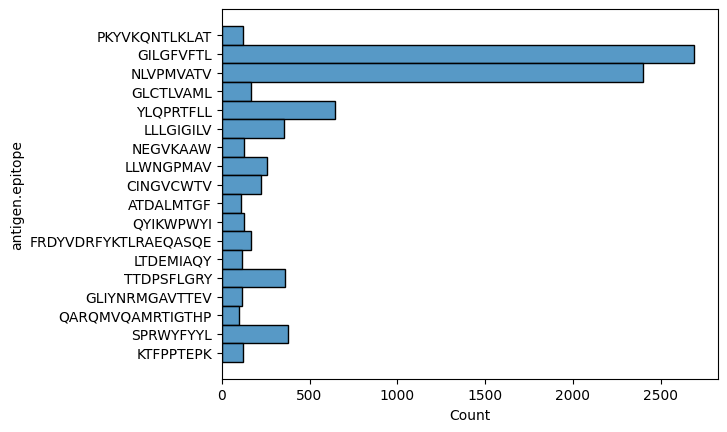

In [29]:


sns.histplot(y=data_preped_a[data_preped_a['antigen.epitope_freq_100']!='other']['antigen.epitope'])

<Axes: xlabel='Count', ylabel='antigen.epitope'>

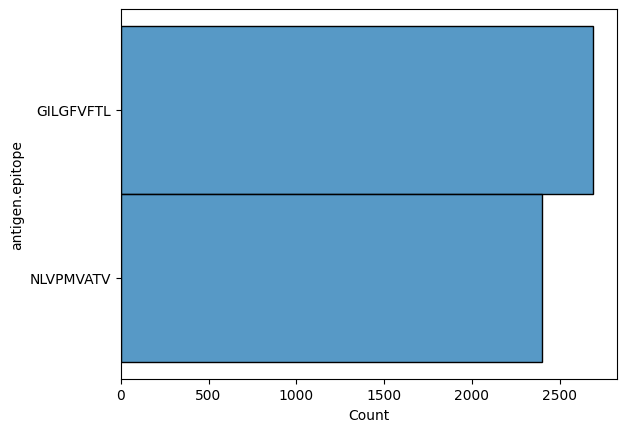

In [32]:
sns.histplot(y=data_preped_a[data_preped_a['antigen.epitope_freq_1000']!='other']['antigen.epitope'])

### Prototypes from VDJdb

In [23]:
data_preped_b.rename({'':'','':'','':''})

,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,d.beta,TRBJ,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,data_id,antigen.epitope_freq,antigen.species_freq
0,CIVRAPGRADMRF,TRAV26-1,TRAJ43,CASSYLPGQGDHYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,0,other,HIV-1
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,1,other,HIV-1
2,CAVPSGAGSYQLTF,TRAV20,TRAJ28,CASSFEPGQGFYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,2,other,HIV-1
3,NaN,NaN,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,3,other,HIV-1
4,CAYRPPGTYKYIF,TRAV38-2DV8,TRAJ40,CASSALASLNEQFF,TRBV14,NaN,TRBJ2-1,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,4,other,HIV-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23963,CIVWNNDMRF,TRAV26-1,TRAJ43,CASSLRSTDTQYF,TRBV7-3,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62166,other,Wheat
23964,CIVYGGSQGNLIF,TRAV26-1,TRAJ42,CASSFRSTDTQYF,TRBV7-3,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62168,other,Wheat
23965,CALSTDSWGKLQF,TRAV6,TRAJ24,CASSPGQGGDNEQFF,TRBV7-3,NaN,TRBJ2-1,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62174,other,Wheat
23966,CAPQGATNKLIF,TRAV12-2,TRAJ32,CASSLGAGGQETQYF,TRBV5-1,NaN,TRBJ2-5,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62175,other,Wheat


### Clean from cross react

In [15]:
data_preped['antigen.species'].drop_duplicates()
## synthetic

0                       InfluenzaA
2                              CMV
3                       SARS-CoV-2
7                              HCV
13                             EBV
16                     HomoSapiens
21                           HIV-1
44                             YFV
88                       HCoV-HKU1
122                          Wheat
127                          DENV2
208                         E.Coli
210                      synthetic
226                        DENV3/4
240                 M.tuberculosis
243                         HTLV-1
251                            HIV
281                          DENV1
387      SelaginellaMoellendorffii
398               TriticumAestivum
1113                  Homo sapiens
1441                           AdV
2235       SaccharomycesCerevisiae
2607                        HPV-16
2767                         HSV-2
3393         PseudomonasAeruginosa
3491                          HIV1
7754                         MCPyV
7965        Pseudomo

In [16]:
data_preped[data_preped['antigen.species']=='synthetic']

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,data_id,antigen.epitope_freq,antigen.species_freq
210,TRA,CAVNFGGGKLIF,HomoSapiens,SMLGIGIVPV,synthetic,synthetic,293,TRAV12-2,TRAJ23,4,6,HLA-A*02:01:48,B2M,MHCI,https://github.com/antigenomics/vdjdb-db/issue...,3,443,other,synthetic
554,TRA,CALSEARGGATNKLIF,HomoSapiens,LMDYWQGQL,synthetic,synthetic,"27000,27007",TRAV19,TRAJ32,5,7,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,1201,other,synthetic
603,TRB,CASSRDFVSNEQYF,HomoSapiens,TMDFYQGQL,synthetic,synthetic,27004,TRBV10-1,TRBJ2-7,4,10,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,1313,other,synthetic
1270,TRA,CAVLSSGGSNYKLTF,HomoSapiens,YLEPGPVTV,synthetic,synthetic,258,TRAV21,TRAJ53,3,5,HLA-A*02:01:48,B2M,MHCI,PMID:26917722,3,2651,other,synthetic
1600,TRA,CALSEARGGATNKLIF,HomoSapiens,GMDYHNGHL,synthetic,synthetic,26997,TRAV19,TRAJ32,5,7,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,3327,other,synthetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34247,TRB,CASSRDTVNTEAFF,HomoSapiens,RLDAMNGQL,synthetic,synthetic,26995,TRBV10-1,TRBJ1-1,4,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,71268,other,synthetic
34418,TRA,CALSEAGMDSNYQLIW,HomoSapiens,SMGVTYEM,synthetic,synthetic,26989,TRAV19,TRAJ33,5,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,71646,other,synthetic
35065,TRB,CASSRDTVNTEAFF,HomoSapiens,RMDYNNMQM,synthetic,synthetic,26996,TRBV10-1,TRBJ1-1,4,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,72984,other,synthetic
35860,TRB,CASSRDFVSNEQYF,HomoSapiens,NMMWFQGQL,synthetic,synthetic,27008,TRBV10-1,TRBJ2-7,4,10,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,74550,other,synthetic


In [17]:
tcr_columns

['cdr3aa', 'v', 'j', 'chain']

In [20]:
data_preped['epi_coint'] = data_preped.groupby(tcr_columns)['data_id'].transform('count')

In [21]:
data_preped[data_preped['epi_coint']>1]

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,data_id,antigen.epitope_freq,antigen.species_freq,epi_coint
31,TRB,CASSLVDREELFF,HomoSapiens,QARQMVQAMRTIGTHP,M1,InfluenzaA,0,TRBV5-6,TRBJ1-4,5,10,HLA-DRA*01,HLA-DRB1*01,MHCII,https://github.com/antigenomics/vdjdb-db/issue...,0,69,other,InfluenzaA,2
35,TRA,CAFKAAGNKLTF,HomoSapiens,RFYKTLRAEQASQ,P24,HIV-1,"301,302,303,304",TRAV24,TRAJ17,3,3,"HLA-DRA*01:01:02,HLA-DRA*01:02:03","HLA-DRB1*15:02:02,HLA-DRB1*01:01:01,HLA-DRB1*1...",MHCII,PMID:29884618,3,76,other,HIV-1,3
36,TRB,CASSVVGNEQFF,HomoSapiens,CINGVCWTV,NS3,HCV,1690,TRBV9,TRBJ2-1,5,7,HLA-A*02:01,B2M,MHCI,NaN,0,79,CINGVCWTV,HCV,3
56,TRB,CASSLGQAYEQYF,HomoSapiens,GLCTLVAML,BMLF1,EBV,0,TRBV7-8,TRBJ2-7,5,8,HLA-A*02:01,B2M,MHCI,PMID:28636589,0,128,GLCTLVAML,EBV,5
59,TRB,CASSFGQGGYEQYF,HomoSapiens,SVLYYQNNV,ORF1ab,SARS-CoV-2,0,TRBV13,TRBJ2-7,4,9,HLA-A*02:01,B2M,MHCI,PMID:34793243,0,138,other,SARS-CoV-2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36092,TRB,CASSLEGDQPQHF,HomoSapiens,IPTNFTISV,Spike,SARS-CoV-2,0,TRBV5-1,TRBJ1-5,5,8,HLA-B*07:02,B2M,MHCI,PMID:34793243,0,75044,other,SARS-CoV-2,2
36099,TRA,CALSEAGMDSNYQLIW,HomoSapiens,YMGVVYEM,synthetic,synthetic,26991,TRAV19,TRAJ33,5,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,75053,other,synthetic,5
36112,TRB,CASSQRQEGDTQYF,HomoSapiens,APRGPHGGAASGL,NY-ESO,HomoSapiens,27064,TRBV28,TRBJ2-3,4,9,HLA-B*07:02,B2M,MHCI,PMID:29531227,3,75082,other,HomoSapiens,2
36118,TRB,CAISESMGTGTQETQYF,HomoSapiens,GTSGSPIVNR,NS3,DENV1,0,TRBV10-3,TRBJ2-5,5,11,HLA-A*11:01,B2M,MHCI,PMID:28945243,0,75092,other,DENV1,2


In [24]:
data_preped[data_preped['cdr3aa']=='CASSVVGNEQFF']

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,data_id,antigen.epitope_freq,antigen.species_freq,epi_coint
36,TRB,CASSVVGNEQFF,HomoSapiens,CINGVCWTV,NS3,HCV,1690,TRBV9,TRBJ2-1,5,7,HLA-A*02:01,B2M,MHCI,NaN,0,79,CINGVCWTV,HCV,3
16995,TRB,CASSVVGNEQFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV9,TRBJ2-1,5,7,HLA-A*02,B2M,MHCI,PMID:28423320,0,35368,NLVPMVATV,CMV,3
25187,TRB,CASSVVGNEQFF,HomoSapiens,GLCTLVAML,BMLF1,EBV,27789,TRBV9,TRBJ2-1,5,7,HLA-A*02:01,B2M,MHCI,"PMID:34793243,PMID:28636589,PMID:19017975",0,52445,GLCTLVAML,EBV,3


### prep for atmtcr

In [22]:
atmtcr_trb_train_path = outputs_path + 'vdjdb_trb_atmtcr_train.csv'
atmtcr_trb_test_path = outputs_path + 'vdjdb_trb_atmtcr_test.csv'

In [40]:
data_preped_trb_train = data_preped_train[data_preped_train['chain']=='TRB'].reset_index(drop=True)
data_preped_trb_test = data_preped_test[data_preped_test['chain']=='TRB'].reset_index(drop=True)

In [41]:
data_preped_trb_train_atmtcr = data_preped_trb_train.rename({label:'Epitope','cdr3aa':'TCR'},axis=1)[['Epitope','TCR']]
data_preped_trb_test_atmtcr = data_preped_trb_test.rename({label:'Epitope','cdr3aa':'TCR'},axis=1)[['Epitope','TCR']]

In [42]:
data_preped_trb_train_atmtcr['Binding Affinity']=1
data_preped_trb_test_atmtcr['Binding Affinity']=1

In [43]:
import tcremb.ml_utils as ml_utils
data_preped_trb_train_atmtcr_n = ml_utils.generate_negative_pairs(data_preped_trb_train_atmtcr, len(data_preped_trb_test_atmtcr)*2 , 'TCR', 'Epitope')
data_preped_trb_train_atmtcr_n['Binding Affinity']=0
data_preped_trb_test_atmtcr_n = ml_utils.generate_negative_pairs(data_preped_trb_test_atmtcr, len(data_preped_trb_test_atmtcr)*2 , 'TCR', 'Epitope')
data_preped_trb_test_atmtcr_n['Binding Affinity']=0

In [44]:
data_preped_trb_train_atmtcr = pd.concat([data_preped_trb_train_atmtcr, data_preped_trb_train_atmtcr_n]).reset_index(drop=True)
data_preped_trb_test_atmtcr = pd.concat([data_preped_trb_test_atmtcr, data_preped_trb_test_atmtcr_n]).reset_index(drop=True)


In [48]:
data_preped_trb_test_atmtcr

,Epitope,TCR,Binding Affinity
0,NLVPMVATV,CASSFPLGGTYEQYF,1
1,NLVPMVATV,CASSLGLDTQYF,1
2,NLVPMVATV,CSARDLDRADNTGELFF,1
3,GTSGSPIVNR,CASLSGRAPQHF,1
4,NLVPMVATV,CASSLNYEQYF,1
...,...,...,...
21628,ELAGIGILTV,CASSPGEARGEQFF,0
21629,TTDPSFLGRY,CASSPGTLSTEAFF,0
21630,QYIKWPWYI,CASSSSFLGNQPQHF,0
21631,NLVPMVATV,CASSRFPTGSNNEQFF,0


In [18]:
#data_preped_trb_atmtcr_train, data_preped_trb_atmtcr_test = train_test_split(data_preped_trb_atmtcr,test_size=0.3)

In [50]:
data_preped_trb_train_atmtcr.to_csv(atmtcr_trb_train_path, index=False, header=False)
data_preped_trb_test_atmtcr.to_csv(atmtcr_trb_test_path, index=False, header=False)

## 10x donor

In [116]:
#donor = 'donor1'
donor = 'donor2'
#donor = 'donor3'
#donor = 'donor4'
label = 'top_tetramer'

In [117]:
barcodes_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/filtered_feature_bc_matrix/barcodes.tsv'
features_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/filtered_feature_bc_matrix/features.tsv'
matrix_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/filtered_feature_bc_matrix/matrix.mtx'
annot_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/vdj_v1_hs_aggregated_' + donor + '_all_contig_annotations.csv'

In [118]:
barcode_tetramer_path = f'10x_proc/{donor}_top_tetramer.csv'

In [119]:
matrix_path_preped = outputs_path + '10x_matrix_' + donor + '.txt'
data_output_path = outputs_path + '10x_annot_data_' + donor + '.txt'
data_paired_output_path = outputs_path + '10x_annot_data_paired' + donor + '.txt'

In [120]:
matrix_path_preped

'data/data_preped/10x_matrix_donor2.txt'

### 10x preprocessing - get matrix with values

### Get top tetramer

In [121]:
barcode_tetramer = pd.read_csv(barcode_tetramer_path)
barcode_tetramer

,barcode,top_tetramer
0,AAACGGGTCAGTACGT-1,GILGFVFTL_Flu-MP_Influenza
1,AAAGCAACACCGAATT-1,RAKFKQLL_BZLF1_EBV
2,AAAGTAGCACCGAATT-1,RAKFKQLL_BZLF1_EBV
3,AAAGTAGCATCCCATC-1,RAKFKQLL_BZLF1_EBV
4,AAATGCCCACACCGCA-1,RAKFKQLL_BZLF1_EBV
...,...,...
44251,TTCGAAGTCCCTAACC-40,RAKFKQLL_BZLF1_EBV
44252,TTCGAAGTCGAGGTAG-40,RAKFKQLL_BZLF1_EBV
44253,TTTACTGAGTGGAGTC-40,GILGFVFTL_Flu-MP_Influenza
44254,TTTCCTCGTCCGTGAC-40,IVTDFSVIK_EBNA-3B_EBV


### prep annot

In [122]:
data_annot = pd.read_csv(annot_path,sep=',')

In [123]:
data = pd.merge(data_annot, barcode_tetramer, on = pairing_id)

In [124]:
data = data.rename({'cdr3':'cdr3aa','v_gene':'v','j_gene':'j'},axis=1)

In [125]:
data = data_proc.annot_id(data, data_id)

In [126]:
data_preped = data_proc.remove_asterisk(data, tcr_columns)
data_preped = data_proc.remove_backslash(data_preped, tcr_columns)
data_preped = data_proc.filter_clones_data(data_preped, tcr_columns)
data_preped = data_preped[data_preped['high_confidence']==True]
data_preped = data_preped[data_preped['is_cell']==True]
data_preped = data_preped[data_preped['chain']!='Multi']

data_preped = data_proc.filter_segments(data_preped)
data_preped.shape

(72872, 20)

### Only 1 barcoce

In [127]:
data_preped = data_preped.sort_values(['umis','reads'],ascending=False).drop_duplicates(['barcode','chain'])
print(data_preped.shape)

(69136, 20)


### frequent labels

In [128]:
label_high = str(label + '_freq')

In [129]:
data_preped = data_proc.freq_labels(label, data_id, data_preped, n = 8)
data_preped = data_proc.freq_labels_tr_list(label, data_id, data_preped, [10,20,30,50,100,500,1000])

### save 

In [116]:
data_preped.to_csv(data_output_path,sep='\t', index = False)

In [117]:
data_preped

,barcode,is_cell,contig_id,high_confidence,length,chain,v,d_gene,j,c_gene,...,top_tetramer,data_id,top_tetramer_freq,top_tetramer_freq_10,top_tetramer_freq_20,top_tetramer_freq_30,top_tetramer_freq_50,top_tetramer_freq_100,top_tetramer_freq_500,top_tetramer_freq_1000
6676,TCATTACGTTGACGTT-3,True,TCATTACGTTGACGTT-3_contig_1,True,678,TRB,TRBV11-2,NaN,TRBJ2-3,TRBC2,...,AVFDRKSDAK_EBNA-3B_EBV,12352,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
873,ACTGTCCGTATATGGA-3,True,ACTGTCCGTATATGGA-3_contig_1,True,1087,TRB,TRBV13,TRBD1,TRBJ2-4,TRBC2,...,AVFDRKSDAK_EBNA-3B_EBV,1627,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
4813,GCATGATAGATCCGAG-6,True,GCATGATAGATCCGAG-6_contig_1,True,690,TRA,TRAV9-2,NaN,TRAJ17,TRAC,...,IVTDFSVIK_EBNA-3B_EBV,8900,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV
4939,GCGAGAATCATGTGGT-6,True,GCGAGAATCATGTGGT-6_contig_1,True,734,TRB,TRBV7-8,TRBD1,TRBJ2-7,TRBC2,...,IVTDFSVIK_EBNA-3B_EBV,9138,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV
4913,GCGACCATCAGTTCGA-4,True,GCGACCATCAGTTCGA-4_contig_1,True,775,TRB,TRBV28,TRBD1,TRBJ1-1,TRBC1,...,AVFDRKSDAK_EBNA-3B_EBV,9088,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7572,TTAGTTCTCTACTATC-5,True,TTAGTTCTCTACTATC-5_contig_2,True,682,TRA,TRAV3,NaN,TRAJ26,TRAC,...,AVFDRKSDAK_EBNA-3B_EBV,14013,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
5320,GGATGTTCAAAGGTGC-6,True,GGATGTTCAAAGGTGC-6_contig_3,True,555,TRA,TRAV21,NaN,TRAJ50,TRAC,...,IVTDFSVIK_EBNA-3B_EBV,9845,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV
5035,GCTCTGTAGATGTGGC-5,True,GCTCTGTAGATGTGGC-5_contig_3,True,568,TRB,TRBV27,TRBD2,TRBJ2-1,TRBC2,...,RAKFKQLL_BZLF1_EBV,9320,RAKFKQLL_BZLF1_EBV,RAKFKQLL_BZLF1_EBV,RAKFKQLL_BZLF1_EBV,other,other,other,other,other
3658,CTAGCCTCAATGGACG-6,True,CTAGCCTCAATGGACG-6_contig_2,True,665,TRB,TRBV11-2,TRBD2,TRBJ2-3,TRBC2,...,IVTDFSVIK_EBNA-3B_EBV,6709,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV


### Map pairs

In [130]:
#data_a = data_preped[data_preped['chain']=='TRA'][['cdr3aa','v','j']+[ pairing_id, label, label_high]].reset_index(drop='True')
data_a = data_preped[data_preped['chain']=='TRA'][['cdr3aa','v','j']+[ pairing_id, label]].reset_index(drop='True')
data_a = data_a.rename({'cdr3aa':'a_cdr3aa','v':'TRAV','j':'TRAJ'},axis=1)
#data_b = data_preped[data_preped['chain']=='TRB'][['cdr3aa','v','j'] + [pairing_id, label, label_high]].reset_index(drop='True')
data_b = data_preped[data_preped['chain']=='TRB'][['cdr3aa','v','j'] + [pairing_id, label]].reset_index(drop='True')
data_b = data_b.rename({'cdr3aa':'b_cdr3aa','v':'TRBV','j':'TRBJ'},axis=1)


In [131]:
data_paired = data_a.merge(data_b,how='outer')
data_paired

,a_cdr3aa,TRAV,TRAJ,barcode,top_tetramer,b_cdr3aa,TRBV,TRBJ
0,CAEMEGGSYIPTF,TRAV5,TRAJ6,GCAATCAAGATATGGT-7,RAKFKQLL_BZLF1_EBV,CASSQRPSEVGELFF,TRBV4-2,TRBJ2-2
1,CAVNVRQAGTALIF,TRAV12-2,TRAJ15,GTAACTGTCCTTTACA-12,RAKFKQLL_BZLF1_EBV,CASSSPGQGTEAFF,TRBV2,TRBJ1-1
2,CALSYMEYGNKLVF,TRAV19,TRAJ47,CAGCAGCCAGCTTCGG-29,GILGFVFTL_Flu-MP_Influenza,CASSTRSTDTQYF,TRBV19,TRBJ2-3
3,CVVTAGNTGKLIF,TRAV12-1,TRAJ37,CATTATCCAATTGCTG-37,GILGFVFTL_Flu-MP_Influenza,CASSRDSASTGELFF,TRBV10-1,TRBJ2-2
4,CGTEYPNDYKLSF,TRAV30,TRAJ20,CAGCCGAAGTGGTAGC-1,GLCTLVAML_BMLF1_EBV,CASSSGLVSNTGELFF,TRBV9,TRBJ2-2
...,...,...,...,...,...,...,...,...
37892,NaN,NaN,NaN,CCACCTATCTGCTTGC-7,RAKFKQLL_BZLF1_EBV,CASSTSTGTGYGYTF,TRBV4-1,TRBJ1-2
37893,NaN,NaN,NaN,TCAATCTAGCCTATGT-11,RAKFKQLL_BZLF1_EBV,CASSQEWLAVSTDTQYF,TRBV4-2,TRBJ2-3
37894,NaN,NaN,NaN,TGACGGCAGGAATCGC-20,AVFDRKSDAK_EBNA-3B_EBV,CASSPTGQGITGELFF,TRBV5-6,TRBJ2-2
37895,NaN,NaN,NaN,CCATTCGAGCAATCTC-24,GILGFVFTL_Flu-MP_Influenza,CASSARSSYEQYF,TRBV19,TRBJ2-7


In [132]:
data_a.drop_duplicates('a_cdr3aa')

,a_cdr3aa,TRAV,TRAJ,barcode,top_tetramer
0,CAEMEGGSYIPTF,TRAV5,TRAJ6,GCAATCAAGATATGGT-7,RAKFKQLL_BZLF1_EBV
1,CAVNVRQAGTALIF,TRAV12-2,TRAJ15,GTAACTGTCCTTTACA-12,RAKFKQLL_BZLF1_EBV
2,CALSYMEYGNKLVF,TRAV19,TRAJ47,CAGCAGCCAGCTTCGG-29,GILGFVFTL_Flu-MP_Influenza
3,CVVTAGNTGKLIF,TRAV12-1,TRAJ37,CATTATCCAATTGCTG-37,GILGFVFTL_Flu-MP_Influenza
4,CGTEYPNDYKLSF,TRAV30,TRAJ20,CAGCCGAAGTGGTAGC-1,GLCTLVAML_BMLF1_EBV
...,...,...,...,...,...
31953,CVLLHRQSRWMDSSYKLIF,TRAV26-1,TRAJ12,CATCGGGTCCAATGGT-12,RAKFKQLL_BZLF1_EBV
31956,CAPAGGGGNKLTF,TRAV24,TRAJ10,GGGATGACACTGAAGG-40,AVFDRKSDAK_EBNA-3B_EBV
31996,CAGLHLSGGGADGLTF,TRAV35,TRAJ45,GAACATCCACGCATCG-21,AVFDRKSDAK_EBNA-3B_EBV
32001,CAFMRRGSTLGRLYF,TRAV24,TRAJ18,TCAGCAAAGACTTGAA-21,AVFDRKSDAK_EBNA-3B_EBV


### save pairs

In [121]:
data_paired.to_csv(data_paired_output_path,sep='\t', index = False)

In [31]:
tcr_columns

['cdr3aa', 'v', 'j', 'chain']

## Prototypes from donor

In [133]:
prototypes_columns = ['cdr3_nt','cdr3aa','v','j']

In [134]:
data_proto_a = data_preped[data_preped['chain']=='TRA']
data_proto_a = data_proto_a[prototypes_columns].drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)
data_proto_b = data_preped[data_preped['chain']=='TRB']
data_proto_b = data_proto_b[prototypes_columns].drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

In [135]:
data_proto_a.to_csv(f'{outputs_path}ptototypes_{donor}_TRA.txt',sep='\t', header=False)
data_proto_b.to_csv(f'{outputs_path}ptototypes_{donor}_TRB.txt',sep='\t', header=False)

## VDJdb as train and 10x as pred

In [7]:
label = 'antigen.epitope'
label_high = 'antigen.epitope_freq'
data_train_path = outputs_path +'VDJdb_data.csv'
label_train = 'antigen.epitope'
label_train_high = 'antigen.epitope_freq'

donor = 'donor1'
data_pred_path = outputs_path + '10x_annot_data_' + donor + '.txt'
label_pred = 'top_tetramer'
label_pred_high = 'top_tetramer_freq'

data_output_path = outputs_path +'VDJdb_10x_train_pred.csv'

In [8]:
data_output_path

'data/data_preped/VDJdb_10x_train_pred.csv'

In [9]:
data_train = pd.read_csv(data_train_path,sep='\t')
data_pred = pd.read_csv(data_pred_path,sep='\t')

In [10]:
data_train

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,antigen.epitope_freq_500,antigen.epitope_freq_1000,antigen.species_freq,antigen.species_freq_10,antigen.species_freq_20,antigen.species_freq_30,antigen.species_freq_50,antigen.species_freq_100,antigen.species_freq_500,antigen.species_freq_1000
0,TRA,CASNTGTASKLTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV24,TRAJ44,2,...,GILGFVFTL,GILGFVFTL,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA
1,TRA,CAVLLEYGNKLVF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV12-2,TRAJ47,3,...,GILGFVFTL,GILGFVFTL,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA
2,TRB,CASSAFPCREGRNNEQFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV6-1,TRBJ2-1,4,...,NLVPMVATV,NLVPMVATV,CMV,CMV,CMV,CMV,CMV,CMV,CMV,CMV
3,TRA,CVVSAIMDSNYQLIW,HomoSapiens,KTFPPTEPK,Nucleocapsid,SARS-CoV-2,29700,TRAV8-2,TRAJ33,4,...,other,other,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2
4,TRB,CASSHGVGQGPYEQYF,HomoSapiens,YLQPRTFLL,Spike,SARS-CoV-2,0,TRBV4-1,TRBJ2-7,4,...,YLQPRTFLL,YLQPRTFLL,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,TRB,CASSLKDSGSYEQYF,HomoSapiens,HTQGYFPD,Nef,HIV,0,TRBV4-3,TRBJ2-7,4,...,other,other,HIV,HIV,HIV,HIV,HIV,HIV,other,other
36189,TRA,CAMRELSNTGKLIF,HomoSapiens,NSAIGKIQY,Spike,SARS-CoV-2,29257,TRAV14DV4,TRAJ37,5,...,other,other,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2
36190,TRA,CALSEASGYSTLTF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRAV19,TRAJ11,5,...,NLVPMVATV,NLVPMVATV,CMV,CMV,CMV,CMV,CMV,CMV,CMV,CMV
36191,TRB,CASSQPQGPTDTQYF,HomoSapiens,GLIYNRMGAVTTEV,M1,InfluenzaA,0,TRBV6-6,TRBJ2-3,4,...,other,other,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA


In [11]:
data_pred

,barcode,is_cell,contig_id,high_confidence,length,chain,v,d_gene,j,c_gene,...,count,data_id,top_tetramer_freq,top_tetramer_freq_10,top_tetramer_freq_20,top_tetramer_freq_30,top_tetramer_freq_50,top_tetramer_freq_100,top_tetramer_freq_500,top_tetramer_freq_1000
0,CTCTAATAGACTGTAA-23,True,CTCTAATAGACTGTAA-23_contig_1,True,701,TRB,TRBV7-6,TRBD2,TRBJ2-3,TRBC2,...,12,25812,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
1,CTAGTGACACGTAAGG-1,True,CTAGTGACACGTAAGG-1_contig_1,True,734,TRB,TRBV7-2,TRBD1,TRBJ2-7,TRBC2,...,5,24499,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
2,TCAGGATCAATGAAAC-2,True,TCAGGATCAATGAAAC-2_contig_1,True,672,TRB,TRBV4-1,TRBD1,TRBJ2-3,TRBC2,...,8,44988,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
3,GTATTCTTCCTTTCTC-8,True,GTATTCTTCCTTTCTC-8_contig_1,True,699,TRB,TRBV27,NaN,TRBJ2-7,TRBC2,...,5,38742,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK
4,TCTATTGCACAGACTT-11,True,TCTATTGCACAGACTT-11_contig_1,True,903,TRB,TRBV4-1,TRBD1,TRBJ2-3,TRBC2,...,7,46508,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25668,ACTGAACCAACGATGG-26,True,ACTGAACCAACGATGG-26_contig_2,True,484,TRA,TRAV35,NaN,TRAJ49,TRAC,...,141,5307,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK
25669,CGCTTCATCCTTGACC-24,True,CGCTTCATCCTTGACC-24_contig_2,True,501,TRA,TRAV35,NaN,TRAJ49,TRAC,...,7,21378,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
25670,TACCTATCACGACGAA-40,True,TACCTATCACGACGAA-40_contig_2,True,605,TRA,TRAV14DV4,NaN,TRAJ45,TRAC,...,15,42114,other,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,other,other,other
25671,TCGAGGCGTCTCTTTA-30,True,TCGAGGCGTCTCTTTA-30_contig_4,True,505,TRA,TRAV35,NaN,TRAJ49,TRAC,...,242,45709,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK


In [12]:
data_train['data_type']='train'
data_pred['data_type']='pred'
data_train[label]=data_train[label_train]
data_train[label_high]=data_train[label_train_high]
data_pred[label]=data_pred[label_pred]
data_pred[label_high]=data_pred[label_pred_high]

In [13]:
data_tt = pd.concat([data_train,data_pred]).reset_index(drop=True)
data_tt

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,top_tetramer,count,top_tetramer_freq,top_tetramer_freq_10,top_tetramer_freq_20,top_tetramer_freq_30,top_tetramer_freq_50,top_tetramer_freq_100,top_tetramer_freq_500,top_tetramer_freq_1000
0,TRA,CASNTGTASKLTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV24,TRAJ44,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRA,CAVLLEYGNKLVF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV12-2,TRAJ47,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRB,CASSAFPCREGRNNEQFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV6-1,TRBJ2-1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRA,CVVSAIMDSNYQLIW,HomoSapiens,KTFPPTEPK,Nucleocapsid,SARS-CoV-2,29700,TRAV8-2,TRAJ33,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRB,CASSHGVGQGPYEQYF,HomoSapiens,YLQPRTFLL,Spike,SARS-CoV-2,0,TRBV4-1,TRBJ2-7,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61861,TRA,CAGHTGNQFYF,NaN,IVTDFSVIK,NaN,NaN,NaN,TRAV35,TRAJ49,NaN,...,IVTDFSVIK,141.0,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK
61862,TRA,CAGHTGNQFYF,NaN,AVFDRKSDAK,NaN,NaN,NaN,TRAV35,TRAJ49,NaN,...,AVFDRKSDAK,7.0,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
61863,TRA,CAMREGVSGGGADGLTF,NaN,FLRGRAYGL,NaN,NaN,NaN,TRAV14DV4,TRAJ45,NaN,...,FLRGRAYGL,15.0,other,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,other,other,other
61864,TRA,CAGHTGNQFYF,NaN,IVTDFSVIK,NaN,NaN,NaN,TRAV35,TRAJ49,NaN,...,IVTDFSVIK,242.0,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK


In [14]:
data_tt.to_csv(data_output_path, sep='\t',index=False)

In [15]:
data_output_path

'data/data_preped/VDJdb_10x_train_pred.csv'

## 10x melanoma data

In [7]:
data_name = '10k_Human_DTC_Melanoma'
label = 'top_gene'

In [8]:
barcodes_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/raw_feature_bc_matrix/barcodes.tsv'
features_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/raw_feature_bc_matrix/features.tsv'
matrix_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/raw_feature_bc_matrix/matrix.mtx'
annot_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/10k_Human_DTC_Melanoma_5p_gemx_Multiplex_vdj_t_all_contig_annotations.csv'

In [9]:
matrix_path_preped = outputs_path + '10x_matrix_' + data_name + '.txt'
data_output_path = outputs_path + '10x_annot_data_' + data_name + '.txt'
data_paired_output_path = outputs_path + '10x_annot_data_paired' + data_name + '.txt'

In [52]:
matrix.to_csv(matrix_path_preped,sep='\t', index = False)

In [ ]:
TPT1

In [15]:
matrix = pd.read_csv(matrix_path_preped,sep='\t')

In [16]:
matrix = data_proc.norm_logp(matrix, 'count')

In [17]:
matrix = matrix[~matrix['value'].isin([
 'MALAT1',
 'HSP90AA1',
 'MT-CO1',
 'MT-CO2',
 'MT2A',
 'MT-CO3'])].reset_index(drop=True)

In [36]:
barcode_gene = data_proc.get_barcode_top_tetramer(matrix)
barcode_gene = barcode_gene[barcode_gene['count']>4]

In [62]:
matrix_gene = matrix[matrix['value']=='TPT1']

<Axes: xlabel='count', ylabel='Count'>

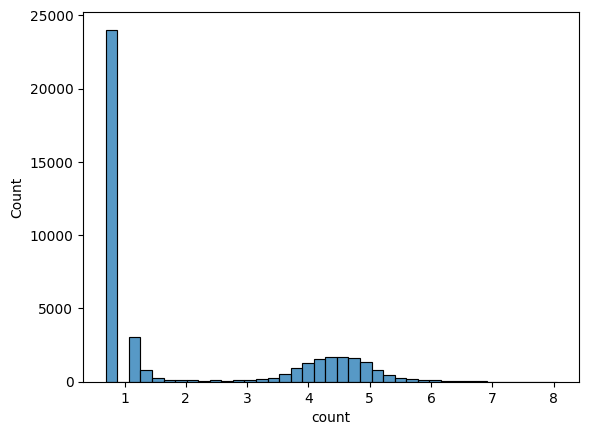

In [63]:
sns.histplot(matrix_gene['count'])

In [64]:
matrix_gene = matrix[matrix['value']=='TPT1']
m = statistics.mean(matrix_gene['count'])
#matrix_gene = matrix_gene[matrix_gene['count']>m].reset_index(drop=True)
matrix_gene = matrix_gene[matrix_gene['count']>4.5].reset_index(drop=True)
g_list = list(matrix_gene['barcode'].drop_duplicates())
barcode_tpt1 = matrix[['barcode_id','barcode']].drop_duplicates()
barcode_tpt1['TPT1'] = barcode_tpt1['barcode'].apply(lambda x: 1 if x in g_list else 0 )

In [57]:
matrix_gene = matrix[matrix['value']=='EEF1A1']
m = statistics.mean(matrix_gene['count'])
matrix_gene = matrix_gene[matrix_gene['count']>m].reset_index(drop=True)
g_list = list(matrix_gene['barcode'].drop_duplicates())
barcode_e1 = matrix[['barcode_id','barcode']].drop_duplicates()
barcode_e1['EEF1A1'] = barcode_e1['barcode'].apply(lambda x: 1 if x in g_list else 0 )

In [58]:
matrix_gene = matrix[matrix['value']=='DNAJB1']
m = statistics.mean(matrix_gene['count'])
matrix_gene = matrix_gene[matrix_gene['count']>m].reset_index(drop=True)
g_list = list(matrix_gene['barcode'].drop_duplicates())
barcode_d1 = matrix[['barcode_id','barcode']].drop_duplicates()
barcode_d1['DNAJB1'] = barcode_d1['barcode'].apply(lambda x: 1 if x in g_list else 0 )

In [65]:
data_annot = pd.read_csv(annot_path,sep=',')

In [66]:
data = pd.merge(data_annot, barcode_gene, on = pairing_id)

In [67]:
data.shape

(15817, 33)

In [68]:
data = pd.merge(data, barcode_tpt1[[pairing_id,'TPT1']], on = pairing_id)

In [69]:
data = data.rename({'cdr3':'cdr3aa','v_gene':'v','j_gene':'j','top_tetramer':label},axis=1)

In [70]:
data = data_proc.annot_id(data, data_id)

In [71]:
data_preped = data_proc.remove_asterisk(data, tcr_columns)
data_preped = data_proc.remove_backslash(data_preped, tcr_columns)
data_preped = data_proc.filter_clones_data(data_preped, tcr_columns)
data_preped = data_preped[data_preped['high_confidence']==True]
data_preped = data_preped[data_preped['is_cell']==True]
data_preped = data_preped[data_preped['chain']!='Multi']

data_preped = data_proc.filter_segments(data_preped)
data_preped.shape

(9093, 35)

In [72]:
data_preped = data_preped.sort_values(['umis','reads'],ascending=False).drop_duplicates(['barcode','chain'])
print(data_preped.shape)

(8249, 35)


In [73]:
label_high = str(label + '_freq')

In [74]:
data_preped = data_proc.freq_labels(label, data_id, data_preped, n = 8)
data_preped = data_proc.freq_labels_tr_list(label, data_id, data_preped, [10,20,30,50,100,500,1000])

In [75]:
data_preped.drop_duplicates('top_gene_freq')

,barcode,is_cell,contig_id,high_confidence,length,chain,v,d_gene,j,c_gene,...,TPT1,data_id,top_gene_freq,top_gene_freq_10,top_gene_freq_20,top_gene_freq_30,top_gene_freq_50,top_gene_freq_100,top_gene_freq_500,top_gene_freq_1000
2053,AGGACCAAGATTCAAC-1,True,AGGACCAAGATTCAAC-1_contig_2,True,520,TRB,TRBV12-4,NaN,TRBJ2-5,TRBC2,...,1,3503,other,ACTB,other,other,other,other,other,other
5675,CGTCGTCTCATTCGCT-1,True,CGTCGTCTCATTCGCT-1_contig_1,True,474,TRB,TRBV29-1,TRBD1,TRBJ2-2,TRBC2,...,0,9875,B2M,B2M,B2M,B2M,B2M,B2M,other,other
7497,GGAGGTCAGACACCGT-1,True,GGAGGTCAGACACCGT-1_contig_1,True,478,TRB,TRBV28,NaN,TRBJ2-1,TRBC2,...,1,13127,DNAJB1,DNAJB1,DNAJB1,DNAJB1,DNAJB1,DNAJB1,other,other
1899,AGCCGTGTCCTTAGTC-1,True,AGCCGTGTCCTTAGTC-1_contig_1,True,469,TRB,TRBV2,NaN,TRBJ2-7,TRBC2,...,1,3236,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1
5551,CGGTCGATCAAGTCCA-1,True,CGGTCGATCAAGTCCA-1_contig_1,True,471,TRB,TRBV29-1,NaN,TRBJ2-2,TRBC2,...,1,9641,HSP90AB1,HSP90AB1,HSP90AB1,HSP90AB1,HSP90AB1,HSP90AB1,other,other
2587,ATAGGAGGTAAACCGT-1,True,ATAGGAGGTAAACCGT-1_contig_2,True,524,TRB,TRBV20-1,NaN,TRBJ2-5,TRBC2,...,0,4446,HSPA1A,HSPA1A,HSPA1A,HSPA1A,HSPA1A,HSPA1A,other,other
8955,GTTATCGAGGCAGGGT-1,True,GTTATCGAGGCAGGGT-1_contig_1,True,471,TRB,TRBV29-1,NaN,TRBJ1-2,TRBC1,...,1,15582,FTH1,FTH1,FTH1,FTH1,FTH1,FTH1,other,other
1158,ACCCAACAGACTAATC-1,True,ACCCAACAGACTAATC-1_contig_1,True,465,TRB,TRBV29-1,NaN,TRBJ2-3,TRBC2,...,1,1966,TPT1,TPT1,TPT1,TPT1,TPT1,TPT1,other,other
6886,GCGAAAGTCCGCAATA-1,True,GCGAAAGTCCGCAATA-1_contig_1,True,512,TRB,TRBV6-5,NaN,TRBJ1-2,TRBC1,...,1,12042,RPS12,RPS12,RPS12,RPS12,RPS12,other,other,other


In [76]:
data_a = data_preped[data_preped['chain']=='TRA'][['cdr3aa','v','j']+[ pairing_id, label, label_high,'TPT1']].reset_index(drop='True')
data_a = data_a.rename({'cdr3aa':'a_cdr3aa','v':'TRAV','j':'TRAJ'},axis=1)
data_b = data_preped[data_preped['chain']=='TRB'][['cdr3aa','v','j'] + [pairing_id, label, label_high,'TPT1']].reset_index(drop='True')
data_b = data_b.rename({'cdr3aa':'b_cdr3aa','v':'TRBV','j':'TRBJ'},axis=1)


In [77]:
data_paired = data_a.merge(data_b,how='outer')
data_paired

,a_cdr3aa,TRAV,TRAJ,barcode,top_gene,top_gene_freq,TPT1,b_cdr3aa,TRBV,TRBJ
0,CAIPRGGNKLTF,TRAV12-3,TRAJ10,AGGACCAAGATTCAAC-1,ACTB,other,1,CASSSTEGLARRETQYF,TRBV12-4,TRBJ2-5
1,CATVAGGTSYGKLTF,TRAV17,TRAJ52,GCAATTGTCCATTGTC-1,EEF1A1,EEF1A1,0,CSATETGGSRFHGYTF,TRBV20-1,TRBJ1-2
2,CAATTSNFGNEKLTF,TRAV13-1,TRAJ48,GTCGGAAAGCTAAATC-1,EEF1A1,EEF1A1,1,CSAVRDSYNEQFF,TRBV20-1,TRBJ2-1
3,CAYRGSGNQFYF,TRAV38-2DV8,TRAJ49,ATGGCGGCACTCCGAA-1,EEF1A1,EEF1A1,1,CASTTAGGWNEQFF,TRBV2,TRBJ2-1
4,CVVNIYTGRRALTF,TRAV12-1,TRAJ5,CGGGTACGTACTGCGA-1,EEF1A1,EEF1A1,1,CASSNPTSDSFRRGETQYF,TRBV7-2,TRBJ2-5
...,...,...,...,...,...,...,...,...,...,...
4705,NaN,NaN,NaN,CTGTATGAGACTACAT-1,RPL13,other,1,CAIRATGTYEQYF,TRBV10-3,TRBJ2-7
4706,NaN,NaN,NaN,CTATCACTCAATCGTG-1,DNAJB1,DNAJB1,1,CASSMLQGNTGELFF,TRBV19,TRBJ2-2
4707,NaN,NaN,NaN,ACCTAGTCACCGACAC-1,EEF1A1,EEF1A1,1,CASSSRGGSINQPQHF,TRBV28,TRBJ1-5
4708,NaN,NaN,NaN,CATGCACAGGTCCCGA-1,APOD,other,1,CASSIPGGNTEAFF,TRBV19,TRBJ1-1


In [55]:
data_output_path

'data/data_preped/10x_annot_data_10k_Human_DTC_Melanoma.txt'

In [79]:
data_paired.to_csv(data_output_path,sep='\t', index = False)